In [ ]:
import os
import json
path_of_the_directory = '~/GRIPAPI_Data/10-day-windows/subMOAS_Combine_Periods'
object = os.scandir(path_of_the_directory)
print("Files and Directories in '% s':" % path_of_the_directory)
files = []
for n in object:
    if n.is_dir() or n.is_file():
        files.append(n.name)
current_file_being_run = ""
print(files)


In [99]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts
sorted_files = sorted(files, key=numericalSort)
for x in sorted_files:
     print("filename: " + x)
    


filename: 1_SuspiciousEvents_Dec01st_Dec10th_SUBMOAS_100Events.json
filename: 2_SuspiciousEvents_Dec11st_Dec20th_SUBMOAS_100Events.json
filename: 3_SuspiciousEvents_Dec21st_Dec30th_SUBMOAS_100Events.json
filename: 4_SuspiciousEvents_Dec31st_Jan09th_SUBMOAS_100Events.json
filename: 5_SuspiciousEvents_Jan10th_Jan19th_SUBMOAS_100Events.json
filename: 6_SuspiciousEvents_Jan20th_Jan29th_SUBMOAS_100Events.json
filename: 7_SuspiciousEvents_Feb01st_Feb10th_subMOAS_90Events.json
filename: 8_SuspiciousEvents_Feb11st_Feb21th_subMOAS_100Events.json
filename: 9_SuspiciousEvents_Feb22nd_March3rd_subMOAS_90Events.json
filename: 10_SuspiciousEvents_March4th_March13th_subMOAS_100Events.json
filename: 11_SuspiciousEvents_March14th_March23rd_subMOAS_100Events.json
filename: 12_SuspiciousEvents_March24th_April02rd_subMOAS_100Events.json
filename: 13_SuspiciousEvents_April03rd_April12th_subMOAS_90Events.json


In [ ]:
Period_Number_of_Attacks_On_ISO_dict = {}
Period_Number_of_Attacks_On_ISO_dict_US = {}
Period_Number_of_Attacks_On_ISO_dict_IN = {}
Period_Number_of_Attacks_On_ISO_dict_IT = {}
Period_Number_of_Attacks_On_ISO_dict_BR = {}
Period_Number_of_Attacks_On_ISO_dict_AU = {}
Period_Number_of_Attacks_On_ISO_dict_RU = {}

#Attacks launched by RU
Period_Number_of_Attacks_By_ISO_dict_RU = {}
Countries_Russia_Attacked = {}
Countries_Attacked_by_Russa = {}

#Attacked launched on Ukraine
All_Attacks_on_Ukraine = []

All_Attacks_on_Ukraine_ASN_Pairs = []
All_Attacks_on_Ukraine_Country_AS_Pairs = {}

Ukraine_SUBMOAS_prefixes = []
Ukraine_SUBMOAS_country_prefix_pairs = {}
Ukraine_SUBMOAS_prefix_tag_pairs = {}
country_asn_count = 0
country_asn_count_2 = 0
prefix_tag_count = 0

object = os.scandir(path_of_the_directory)
#for n in filename:
for n in object:
    if n.is_dir() or n.is_file():
        print(path_of_the_directory + "/" + n.name)
        current_file_being_run = str(path_of_the_directory + "/" + n.name)
        print(str(current_file_being_run))

        #For opening individual file
        #file = open("C:/Users/dadab/Documents/GeorgiaTechSpring2022/Research/GRIPAPI_Data/10-day-windows/MOAS/SuspiciousEvents_Feb22nd_March3rd_MOAS_100Events.json")
        
        
        #File has to be opened with specific encoding rather than static UTF-8 encoding so all characters can be processed.
        file = open(current_file_being_run, encoding='Latin1')
        contents = json.load(file)
        data = contents['data']

        attacked_iso_dict = {}
        attacker_iso_dict = {}
        
        #Attack and Attacked ISOs for each country of record
        
        #Ukraine
        Attacked_ISO_UA = []
        Attacker_ISO_UA = []
        
        #United States
        Attacked_ISO_US = []
        Attacker_ISO_US = []
        
        #India
        Attacked_ISO_IN = []
        Attacker_ISO_IN = []
        
        #Italy
        Attacked_ISO_IT = []
        Attacker_ISO_IT = []
        
        #Brazil
        Attacked_ISO_BR = []
        Attacker_ISO_BR = []
        
        #Australia
        Attacked_ISO_AU = []
        Attacker_ISO_AU = []
        
        #Russia
        Attacked_ISO_RU = []
        Attacker_ISO_RU = []
        
        
        #The time frame can be pulled from the file name
        time_frame = (n.name).split('_MOAS')
       # print("time_frame: " + str(time_frame))
        Period_Number_of_Attacks_On_ISO_dict[str(time_frame[0])] = 0
        Period_Number_of_Attacks_On_ISO_dict_US[str(time_frame[0])] = 0
        Period_Number_of_Attacks_On_ISO_dict_IN[str(time_frame[0])] = 0
        Period_Number_of_Attacks_On_ISO_dict_IT[str(time_frame[0])] = 0
        Period_Number_of_Attacks_On_ISO_dict_BR[str(time_frame[0])] = 0
        Period_Number_of_Attacks_On_ISO_dict_AU[str(time_frame[0])] = 0
        Period_Number_of_Attacks_On_ISO_dict_RU[str(time_frame[0])] = 0 
        
        
        Period_Number_of_Attacks_By_ISO_dict_RU[str(time_frame[0])] = 0  
        
        #Collect asn number info of attacker asn and attacked asn
        i = 0
        # Not all files have 100 events records - some have less (should be accounted for in data analysis)
        #while i < 100:
        while i < len(contents['data']): 
            asinfo_contents = contents['data'][i]['asinfo']
            #print("Number of asinfo_contents: " + str(len(contents['data'])))
            attacked_asinfo = list(asinfo_contents.keys())[0]
            attacker_asinfo = list(asinfo_contents.keys())[1]

            #print("attacked_asinfo: " + attacked_asinfo + ", " + "attacker_asinfo: " + attacker_asinfo)

            #Get the attacked AS ISO. If this info exist, return it. If iso is unreachable, attacked_asinfo should be listed as None regardless of what meta data is None
            if ((contents['data'][i]['asinfo'][attacked_asinfo]['asrank'] is None)
                or (contents['data'][i]['asinfo'][attacked_asinfo]['asrank']['organization'] is None)
                or (contents['data'][i]['asinfo'][attacked_asinfo]['asrank']['organization']['country'] is None)
                or (contents['data'][i]['asinfo'][attacked_asinfo]['asrank']['organization']['country']['iso'] is None)):
                    attacked_asinfo_iso = None
                    attacked_asinfo_name = None
                    #print("Attacked ISO: NONE")
            elif ((contents['data'][i]['asinfo'][attacked_asinfo]['asrank'] is not None) 
                  and (contents['data'][i]['asinfo'][attacked_asinfo]['asrank']['organization'] is not None)
                  and (contents['data'][i]['asinfo'][attacked_asinfo]['asrank']['organization']['country'] is not None)
                  and (contents['data'][i]['asinfo'][attacked_asinfo]['asrank']['organization']['country']['iso'] is not None)):
                    attacked_asinfo_iso = contents['data'][i]['asinfo'][attacked_asinfo]['asrank']['organization']['country']['iso']
                    attacked_asinfo_name = contents['data'][i]['asinfo'][attacked_asinfo]['asrank']['organization']['country']['name']
                    
                    #print("Attacked ISO: " + str(attacked_asinfo_iso))
                    #print("Attacked ASN: " + str(attacked_asinfo_asn))
                        

                    
            #Get the attacker AS ISO. If this info exist, return it. If iso is unreachable, attacker_asinfo should be listed as None regardless of what meta data is None 
            if ((contents['data'][i]['asinfo'][attacker_asinfo]['asrank'] is None)
                or (contents['data'][i]['asinfo'][attacker_asinfo]['asrank']['organization'] is None)
                or (contents['data'][i]['asinfo'][attacker_asinfo]['asrank']['organization']['country'] is None)
                or (contents['data'][i]['asinfo'][attacker_asinfo]['asrank']['organization']['country']['iso'] is None)):
                    attacker_asinfo_iso = None
                    attacker_asinfo_name = None

                    #print("Attacker ISO: NONE")
            elif ((contents['data'][i]['asinfo'][attacker_asinfo]['asrank'] is not None) 
                  and (contents['data'][i]['asinfo'][attacker_asinfo]['asrank']['organization'] is not None)
                  and (contents['data'][i]['asinfo'][attacker_asinfo]['asrank']['organization']['country'] is not None)
                  and (contents['data'][i]['asinfo'][attacker_asinfo]['asrank']['organization']['country']['iso'] is not None)):
                    attacker_asinfo_iso = contents['data'][i]['asinfo'][attacker_asinfo]['asrank']['organization']['country']['iso']
                    attacker_asinfo_name = contents['data'][i]['asinfo'][attacker_asinfo]['asrank']['organization']['country']['name']
                    #print("Attacker ISO: " + str(attacker_asinfo_iso))
               

                    #Add the pair of ASes where Ukraine is attacker to the list of victim-attacker pairs where UA is attacker
                    if (attacked_asinfo_iso is not None and str(attacker_asinfo_iso) == "UA"): 
                        Attacker_ISO_UA.append(attacked_asinfo_iso + "-" + attacker_asinfo_iso)
                    elif (attacked_asinfo_iso is None and str(attacker_asinfo_iso) == "UA"): 
                        Attacker_ISO_UA.append("None-" + attacker_asinfo_iso)
                    
                    
                    pair = ""
                     #Add the pair of ASes where Russia is attacker to the list of victim-attacker pairs where RU is attacker
                    if (attacked_asinfo_name is not None and str(attacker_asinfo_iso) == "RU"): 
                        pair = attacked_asinfo_name + "-" + attacker_asinfo_name
                        #asn_pair = attacked_asinfo_asn + "-" + attacker_asinfo_asn 
                        Attacker_ISO_RU.append(attacked_asinfo_name + "-" + attacker_asinfo_iso)
                        
                        #Add to the list of countries that Russia attacked and how many times Russia attacked it
                        if (pair not in Countries_Russia_Attacked):
                            Countries_Russia_Attacked[pair] = 1
                        else:
                            Countries_Russia_Attacked[pair] += 1
                            
                    elif (attacked_asinfo_iso is None and str(attacker_asinfo_iso) == "RU"): 
                        Attacker_ISO_RU.append("None-" + attacker_asinfo_iso)
                        pair = "None-" + attacker_asinfo_name
                        
                        #Add to the list of countries that Russia attacked and how many times Russia attacked it
                        if (pair not in Countries_Russia_Attacked):
                            Countries_Russia_Attacked[pair] = 1
                        else:
                            Countries_Russia_Attacked[pair] += 1
            
             #Add the pair of ASes where Ukraine is victim to the list of victim-attacker pairs where UA is attacked
                    if (str(attacked_asinfo_iso) == "UA" and attacker_asinfo_iso is not None): 
                        Attacked_ISO_UA.append(attacked_asinfo_iso + "-" + attacker_asinfo_iso)
                        All_Attacks_on_Ukraine.append(attacked_asinfo_iso + "-" + attacker_asinfo_iso)
                        #All_Attacks_on_Ukraine_ASN_Pairs.append(attacked_asinfo_asn + "-" + attacker_asinfo_asn)
    
                    elif (str(attacked_asinfo_iso) == "UA" and attacker_asinfo_iso is None): 
                        Attacked_ISO_UA.append(attacked_asinfo_iso + "-None")
                        All_Attacks_on_Ukraine.append(attacked_asinfo_iso + "-" + attacker_asinfo_iso)
                        #All_Attacks_on_Ukraine_ASN_Pairs.append(attacked_asinfo_asn + "-" + attacker_asinfo_asn)
                        
                    #Add the pair of ASes where United States is victim to the list of victim-attacker pairs where US is attacked
                    if (str(attacked_asinfo_iso) == "US" and attacker_asinfo_iso is not None): 
                        Attacked_ISO_US.append(attacked_asinfo_iso + "-" + attacker_asinfo_iso)
                    elif (str(attacked_asinfo_iso) == "US" and attacker_asinfo_iso is None): 
                        Attacked_ISO_US.append(attacked_asinfo_iso + "-None")
                        
                    #Add the pair of ASes where India is victim to the list of victim-attacker pairs where IN is attacked
                    if (str(attacked_asinfo_iso) == "IN" and attacker_asinfo_iso is not None): 
                        Attacked_ISO_IN.append(attacked_asinfo_iso + "-" + attacker_asinfo_iso)
                    elif (str(attacked_asinfo_iso) == "IN" and attacker_asinfo_iso is None): 
                        Attacked_ISO_IN.append(attacked_asinfo_iso + "-None")
                        
                    #Add the pair of ASes where Italy is victim to the list of victim-attacker pairs where Italy is attacked
                    if (str(attacked_asinfo_iso) == "IT" and attacker_asinfo_iso is not None): 
                        Attacked_ISO_IT.append(attacked_asinfo_iso + "-" + attacker_asinfo_iso)
                    elif (str(attacked_asinfo_iso) == "IT" and attacker_asinfo_iso is None): 
                        Attacked_ISO_IT.append(attacked_asinfo_iso + "-None")
                    
                    #Add the pair of ASes where Brazil victim to the list of victim-attacker pairs where BR is attacked
                    if (str(attacked_asinfo_iso) == "BR" and attacker_asinfo_iso is not None): 
                        Attacked_ISO_BR.append(attacked_asinfo_iso + "-" + attacker_asinfo_iso)
                    elif (str(attacked_asinfo_iso) == "BR" and attacker_asinfo_iso is None): 
                        Attacked_ISO_BR.append(attacked_asinfo_iso + "-None")
                        
                    #Add the pair of ASes where Australia victim to the list of victim-attacker pairs where AU is attacked
                    if (str(attacked_asinfo_iso) == "AU" and attacker_asinfo_iso is not None): 
                        Attacked_ISO_AU.append(attacked_asinfo_iso + "-" + attacker_asinfo_iso)
                    elif (str(attacked_asinfo_iso) == "AU" and attacker_asinfo_iso is None): 
                        Attacked_ISO_AU.append(attacked_asinfo_iso + "-None")
                    
                    #Add the pair of ASes where Russia victim to the list of victim-attacker pairs where RU is attacked
                    
                    if (str(attacked_asinfo_iso) == "RU" and attacker_asinfo_iso is not None):
                        Attacked_ISO_RU.append(attacked_asinfo_iso + "-" + attacker_asinfo_iso)
                    elif (str(attacked_asinfo_iso) == "RU" and attacker_asinfo_iso is None):
                        pair = attacked_asinfo_iso + "-None"
                        Attacked_ISO_RU.append(attacked_asinfo_iso + "-None")
                        
                        #Add to the list of countries that Russia attacked and how many times Russia attacked it
                        if (pair not in Countries_Russia_Attacked):
                            Countries_Russia_Attacked[pair] = 1
                        else:
                            Countries_Russia_Attacked[pair] += 1
                            
            #Get the attacked ASN. If this info exist, return it.
            if ((contents['data'][i]['asinfo'][attacked_asinfo]['asrank'] is None)
                or (contents['data'][i]['asinfo'][attacked_asinfo]['asrank']['asn'] is None)):
                    attacked_asinfo_asn =  None
            elif((contents['data'][i]['asinfo'][attacked_asinfo]['asrank'] is not None)
                and (contents['data'][i]['asinfo'][attacked_asinfo]['asrank']['asn'] is not None)):
                attacked_asinfo_asn =  contents['data'][i]['asinfo'][attacked_asinfo]['asrank']['asn']                
            
            #Get the attacker ASN. If this info exist, return it.
            if ((contents['data'][i]['asinfo'][attacker_asinfo]['asrank'] is None)
                or (contents['data'][i]['asinfo'][attacker_asinfo]['asrank']['asn'] is None)):
                    attacker_asinfo_asn =  None
            elif((contents['data'][i]['asinfo'][attacker_asinfo]['asrank'] is not None)
                and (contents['data'][i]['asinfo'][attacker_asinfo]['asrank']['asn'] is not None)):
                attacker_asinfo_asn =  contents['data'][i]['asinfo'][attacker_asinfo]['asrank']['asn']
                
            #Get the MOAS subprefix
            #print(str(contents['data'][i]['pfx_events'][0]['prefix']))
            
            
            if (attacked_asinfo_iso == "UA"):
                #If the attacked AS has iso code=UA, then save the Country-ASN pairs
                country_asn_count +=1
                Attacker_Attack_Pair = str(attacked_asinfo_asn) + "-" + str( attacker_asinfo_asn)
                #print(str(All_Attacks_on_Ukraine_ASN_Pairs))
                if (attacked_asinfo_iso is None): 
                    attacked_asinfo_iso_string = "None"
                else: 
                    attacked_asinfo_iso_string = str(attacked_asinfo_iso)
                    
                if (attacker_asinfo_iso is None): 
                    attacker_asinfo_iso_string = "None"
                else: 
                    attacker_asinfo_iso_string = str(attacker_asinfo_iso)
                country_pairs = str(country_asn_count) + "_" + attacked_asinfo_iso_string + "-" + attacker_asinfo_iso_string
                #if (country_pairs in All_Attacks_on_Ukraine_Country_AS_Pairs):
                #All_Attacks_on_Ukraine_ASN_Pairs[country_pairs] = All_Attacks_on_Ukraine_ASN_Pairs.append(Attacker_Attack_Pair)
                All_Attacks_on_Ukraine_Country_AS_Pairs[country_pairs] = Attacker_Attack_Pair
                #print(str(All_Attacks_on_Ukraine_Country_AS_Pairs))
                
                
                #If the attacked AS has iso code=UA, then save the ASNPair-Prefix pairs
                country_asn_count_2 +=1
                super_prefix = contents['data'][i]['pfx_events'][0]['super_pfx']
                sub_prefix = contents['data'][i]['pfx_events'][0]['sub_pfx']
                adv_prefixes = contents['data'][i]['summary']['prefixes']
                print("adv_prefixes: " + str(adv_prefixes))
                if (attacked_asinfo_iso is None): 
                    attacked_asinfo_iso_string = "None"
                else: 
                    attacked_asinfo_iso_string = str(attacked_asinfo_iso)
                    
                if (attacker_asinfo_iso is None): 
                    attacker_asinfo_iso_string = "None"
                else: 
                    attacker_asinfo_iso_string = str(attacker_asinfo_iso)
                country_pairs = str(country_asn_count) + "_" + attacked_asinfo_iso_string + "-" + attacker_asinfo_iso_string
                country_pairs_2 = str(country_asn_count_2) + "_" + attacked_asinfo_iso_string + "-" + attacker_asinfo_iso_string
                Ukraine_SUBMOAS_country_prefix_pairs[country_pairs_2] = "Super_pfx: " + super_prefix + ", Sub_pfx: " + sub_prefix
                #print(str(Ukraine_SUBMOAS_country_prefix_pairs))
                
                
                #If the attacked AS has iso code=UA, then save the Prefix-Tag_pairs
                prefix_tag_count +=1
                #prefixes_in_list = str(prefix_tag_count) + "_" + str(super_prefix) + "_" + str(sub_prefix)
                prefixes_in_list = str(super_prefix) + "_" + str(sub_prefix)
                list_of_tags = []
                for tag in contents['data'][i]['pfx_events'][0]['tags']: 
                    list_of_tags.append(tag['name'])
                
                Ukraine_SUBMOAS_prefix_tag_pairs[prefixes_in_list] = list_of_tags
                #Ukraine_SUBMOAS_prefix_tag_pairs[prefixes_in_list] = contents['data'][i]['pfx_events'][0]['tags'][0]
                
            
        
            
                
            #print("Attacked_ASN - Attacker_ASN:" + str(attacked_asinfo_asn) + "-" + str( attacker_asinfo_asn))


            #If attacked AS iso already exist in the dictionary, then increment the count; otherwise, increment the value by 1
            if (attacked_asinfo_iso is not None and attacked_asinfo_iso not in attacked_iso_dict.keys()):
                attacked_iso_dict[attacked_asinfo_iso] = 1; 
            elif (attacked_asinfo_iso is None and 'None' not in attacked_iso_dict.keys()): 
                attacker_iso_dict['None'] = 1;
            elif (attacked_asinfo_iso is None and 'None' in attacked_iso_dict.keys()): 
                attacker_iso_dict['None'] += 1;
            else: 
                attacked_iso_dict[attacked_asinfo_iso] += 1;

            #If attacker AS iso already exist in the attacked dictionary, then increment the count; otherwise, increment the value by 1
            if (attacker_asinfo_iso is not None and attacker_asinfo_iso not in attacker_iso_dict.keys()):
                attacker_iso_dict[attacker_asinfo_iso] = 1;
            elif (attacker_asinfo_iso is None and 'None' not in attacker_iso_dict.keys()): 
                attacker_iso_dict['None'] = 1;
            elif (attacker_asinfo_iso is None and 'None' in attacker_iso_dict.keys()): 
                attacker_iso_dict['None'] += 1;
            else: 
                attacker_iso_dict[attacker_asinfo_iso] += 1;

            i = i+1
        

        #Print the attacked_iso_dict and attacker_iso_dict

        #print("\n" + "attacked_iso_dict: " + str(attacked_iso_dict) + '\n')
        #print("attacker_iso_dict: " + str(attacker_iso_dict) + '\n')


        #Plot the each dictionary as a bar graph
        import matplotlib.pyplot as plt
        import numpy as np
        from collections import OrderedDict

        #marklist = sorted(attacked_iso_dict.items(), key=lambda x: x[1], reverse=False)
        #attacked_iso_dict = OrderedDict(sorted(attacked_iso_dict.items(), key=lambda x: x[1], reverse=True)
        #plt.bar(range(len(attacked_iso_dict)), list(OrderedDict(sorted(attacked_iso_dict.items(), key=lambda x: x[1], reverse=True)), align='center')

        #Bargraph showing number of times each countried was targeted by suspicious ISO
#         plt.bar(range(len(attacked_iso_dict)), list(attacked_iso_dict.values()), align='center')
#         plt.xticks(range(len(attacked_iso_dict)), list(attacked_iso_dict.keys()), fontsize=20)
#         plt.yticks([5, 10, 15, 20, 25], fontsize=15)
#         plt.ylabel('Number of Suspicious Events', fontsize=15)
#         plt.xlabel('Country ISOs', fontsize=15)
#         plt.title('Number of Suspicious Events for Each ISO (Attacked ASes)', fontsize=15)
#         plt.rcParams["figure.figsize"] = (20,10)
#         plt.show()


        #Plot the each dictionary as a bar graph
        import matplotlib.pyplot as plt
        import numpy as np
        from collections import OrderedDict

        #Bargraph showing number of times each countried was targeted by suspicious ISO
#         plt.bar(range(len(attacker_iso_dict)), list(attacker_iso_dict.values()), align='center')
#         plt.xticks(range(len(attacker_iso_dict)), list(attacker_iso_dict.keys()), fontsize=20)
#         plt.yticks([5, 10, 15, 20, 25], fontsize=20)
#         plt.ylabel('Number of Suspicious Events', fontsize=20)
#         plt.xlabel('Country ISOs', fontsize=20)
#         plt.title('Number of Suspicious Events for Each ISO (Attacker ASes)', fontsize=20)
#         plt.rcParams["figure.figsize"] = (25,15)
#         plt.show()

        #Find Pairs of ASes that involve Ukraine's ISO
        #print("Attacked_ISO_UA: " + str(Attacked_ISO_UA))
        #print("Attacker_ISO_UA: " + str(Attacker_ISO_UA))

        num_UA_RU = 0
        for n in Attacked_ISO_UA: 
            if (str(n) == "UA-RU"):
                num_UA_RU +=1
        #print(num_UA_RU)  

        Period_Number_of_Attacks_On_ISO_dict[str(time_frame[0])] = len(Attacked_ISO_UA)
        Period_Number_of_Attacks_On_ISO_dict_US[str(time_frame[0])] = len(Attacked_ISO_US)
        Period_Number_of_Attacks_On_ISO_dict_IN[str(time_frame[0])] = len(Attacked_ISO_IN)
        Period_Number_of_Attacks_On_ISO_dict_IT[str(time_frame[0])] = len(Attacked_ISO_IT)
        Period_Number_of_Attacks_On_ISO_dict_BR[str(time_frame[0])] = len(Attacked_ISO_BR)
        Period_Number_of_Attacks_On_ISO_dict_AU[str(time_frame[0])] = len(Attacked_ISO_AU)
        Period_Number_of_Attacks_On_ISO_dict_RU[str(time_frame[0])] = len(Attacked_ISO_RU)
        
        Period_Number_of_Attacks_By_ISO_dict_RU[str(time_frame[0])] = len(Attacker_ISO_RU) 


object.close()


In [101]:
#Who is Ukraine receiving suspicious behavior from?
print("Attacks on Ukraine: " + str(All_Attacks_on_Ukraine))

Attacks on Ukraine: ['UA-UA', 'UA-UA', 'UA-UA', 'UA-UA', 'UA-UA', 'UA-US', 'UA-US', 'UA-US', 'UA-UA', 'UA-UA', 'UA-UA', 'UA-UA', 'UA-UA', 'UA-UA', 'UA-UA', 'UA-UA', 'UA-UA', 'UA-UA', 'UA-UA', 'UA-UA', 'UA-RU', 'UA-RU', 'UA-UA', 'UA-TR']


In [102]:
#What ASes are involved? 
print(str(All_Attacks_on_Ukraine_Country_AS_Pairs))


{'1_UA-UA': '50499-61003', '2_UA-UA': '6849-6877', '3_UA-UA': '6849-6877', '4_UA-UA': '6849-6877', '5_UA-UA': '6849-6877', '6_UA-US': '197945-8075', '7_UA-US': '197945-8075', '8_UA-US': '197945-8075', '9_UA-UA': '6849-6877', '10_UA-UA': '6849-6877', '11_UA-UA': '6849-6877', '12_UA-UA': '6849-6877', '13_UA-UA': '6849-6877', '14_UA-UA': '6849-6877', '15_UA-UA': '6849-6877', '16_UA-UA': '6849-6877', '17_UA-UA': '6849-6877', '18_UA-UA': '6849-6877', '19_UA-UA': '6849-6877', '20_UA-UA': '6849-6877', '21_UA-RU': '45025-49037', '22_UA-RU': '45025-49037', '23_UA-UA': '3255-59671', '24_UA-TR': '15626-43260', '25_UA-None': '197726-None'}


In [103]:
#What are the prefixes impacted?
print(str(Ukraine_SUBMOAS_country_prefix_pairs))

{'1_UA-UA': 'Super_pfx: 193.106.248.0/22, Sub_pfx: 193.106.249.0/24', '2_UA-UA': 'Super_pfx: 46.200.0.0/14, Sub_pfx: 46.202.0.0/15', '3_UA-UA': 'Super_pfx: 213.186.96.0/19, Sub_pfx: 213.186.96.0/20', '4_UA-UA': 'Super_pfx: 46.200.0.0/14, Sub_pfx: 46.202.0.0/15', '5_UA-UA': 'Super_pfx: 37.52.0.0/14, Sub_pfx: 37.52.224.0/20', '6_UA-US': 'Super_pfx: 193.150.88.0/23, Sub_pfx: 193.150.88.0/24', '7_UA-US': 'Super_pfx: 193.150.88.0/23, Sub_pfx: 193.150.88.0/24', '8_UA-US': 'Super_pfx: 193.150.88.0/23, Sub_pfx: 193.150.88.0/24', '9_UA-UA': 'Super_pfx: 213.186.96.0/19, Sub_pfx: 213.186.96.0/20', '10_UA-UA': 'Super_pfx: 46.200.0.0/14, Sub_pfx: 46.202.0.0/15', '11_UA-UA': 'Super_pfx: 37.52.0.0/14, Sub_pfx: 37.52.224.0/20', '12_UA-UA': 'Super_pfx: 37.52.0.0/14, Sub_pfx: 37.52.224.0/20', '13_UA-UA': 'Super_pfx: 37.52.0.0/14, Sub_pfx: 37.52.224.0/20', '14_UA-UA': 'Super_pfx: 37.52.0.0/14, Sub_pfx: 37.52.224.0/20', '15_UA-UA': 'Super_pfx: 37.52.0.0/14, Sub_pfx: 37.52.224.0/20', '16_UA-UA': 'Super_pfx

In [104]:
#What are the tags associated with each prefix?
for element in Ukraine_SUBMOAS_prefix_tag_pairs:
    print(str(element) + ": " + str(Ukraine_SUBMOAS_prefix_tag_pairs[element])+ "\n")

193.106.248.0/22_193.106.249.0/24: ['newcomer-more-specific', 'all-origins-same-country', 'rpki-some-oldcomer-unknown-roa', 'rpki-all-oldcomer-unknown-roa', 'rpki-all-newcomer-unknown-roa', 'rpki-some-newcomer-unknown-roa', 'not-previously-announced-by-any-newcomer', 'hegemony-valley-paths']

46.200.0.0/14_46.202.0.0/15: ['rpki-all-oldcomer-unknown-roa', 'rpki-some-newcomer-unknown-roa', 'rpki-some-oldcomer-unknown-roa', 'rpki-all-newcomer-unknown-roa', 'newcomer-more-specific', 'not-previously-announced-by-any-newcomer', 'newcomers-always-on-oldcomer-originated-paths']

213.186.96.0/19_213.186.96.0/20: ['rpki-all-newcomer-unknown-roa', 'newcomers-always-on-oldcomer-originated-paths', 'rpki-some-newcomer-unknown-roa', 'rpki-all-oldcomer-unknown-roa', 'not-previously-announced-by-any-newcomer', 'newcomer-more-specific', 'hegemony-valley-paths', 'rpki-some-oldcomer-unknown-roa']

37.52.0.0/14_37.52.224.0/20: ['rpki-all-oldcomer-unknown-roa', 'outdated-info', 'rpki-some-newcomer-unknown-r

In [105]:
total_number_of_tags = 0
list_of_tags_count = {}
#What are the tags associated with each prefix?
for element in Ukraine_SUBMOAS_prefix_tag_pairs:
    print(str(element) + ": " + str(Ukraine_SUBMOAS_prefix_tag_pairs[element])+ "\n")
    total_number_of_tags += len(Ukraine_SUBMOAS_prefix_tag_pairs[element])
    for tag in Ukraine_SUBMOAS_prefix_tag_pairs[element]:
        if tag in list_of_tags_count:
            list_of_tags_count[tag] += 1
        else: 
            list_of_tags_count[tag] = 1

#print("total_number_of_tags: " + str(total_number_of_tags))
#print("list_of_tags_count: " + str(list_of_tags_count ))

193.106.248.0/22_193.106.249.0/24: ['newcomer-more-specific', 'all-origins-same-country', 'rpki-some-oldcomer-unknown-roa', 'rpki-all-oldcomer-unknown-roa', 'rpki-all-newcomer-unknown-roa', 'rpki-some-newcomer-unknown-roa', 'not-previously-announced-by-any-newcomer', 'hegemony-valley-paths']

46.200.0.0/14_46.202.0.0/15: ['rpki-all-oldcomer-unknown-roa', 'rpki-some-newcomer-unknown-roa', 'rpki-some-oldcomer-unknown-roa', 'rpki-all-newcomer-unknown-roa', 'newcomer-more-specific', 'not-previously-announced-by-any-newcomer', 'newcomers-always-on-oldcomer-originated-paths']

213.186.96.0/19_213.186.96.0/20: ['rpki-all-newcomer-unknown-roa', 'newcomers-always-on-oldcomer-originated-paths', 'rpki-some-newcomer-unknown-roa', 'rpki-all-oldcomer-unknown-roa', 'not-previously-announced-by-any-newcomer', 'newcomer-more-specific', 'hegemony-valley-paths', 'rpki-some-oldcomer-unknown-roa']

37.52.0.0/14_37.52.224.0/20: ['rpki-all-oldcomer-unknown-roa', 'outdated-info', 'rpki-some-newcomer-unknown-r

In [106]:
#Print the percentage of the frequency of each tag
for tag in list_of_tags_count: 
    print(str(tag) + ": " + str(list_of_tags_count[tag]/total_number_of_tags * 100))

#print("list_of_tags_count: " + str(list_of_tags_count))

newcomer-more-specific: 12.658227848101266
all-origins-same-country: 1.2658227848101267
rpki-some-oldcomer-unknown-roa: 10.126582278481013
rpki-all-oldcomer-unknown-roa: 10.126582278481013
rpki-all-newcomer-unknown-roa: 10.126582278481013
rpki-some-newcomer-unknown-roa: 10.126582278481013
not-previously-announced-by-any-newcomer: 12.658227848101266
hegemony-valley-paths: 3.79746835443038
newcomers-always-on-oldcomer-originated-paths: 5.063291139240507
outdated-info: 2.5316455696202533
prefix-small-edit-distance: 3.79746835443038
rpki-some-newcomer-invalid-roa: 2.5316455696202533
rpki-some-oldcomer-valid-roa: 1.2658227848101267
rpki-all-newcomer-invalid-roa: 2.5316455696202533
rpki-newcomer-invalid-roa-due-to-length: 1.2658227848101267
rpki-all-oldcomer-valid-roa: 1.2658227848101267
oldcomer-path-prepending: 3.79746835443038
rpki-all-oldcomer-invalid-roa: 1.2658227848101267
rpki-oldcomer-invalid-roa-due-to-length: 1.2658227848101267
rpki-newcomer-invalid-roa-due-to-as: 1.265822784810126

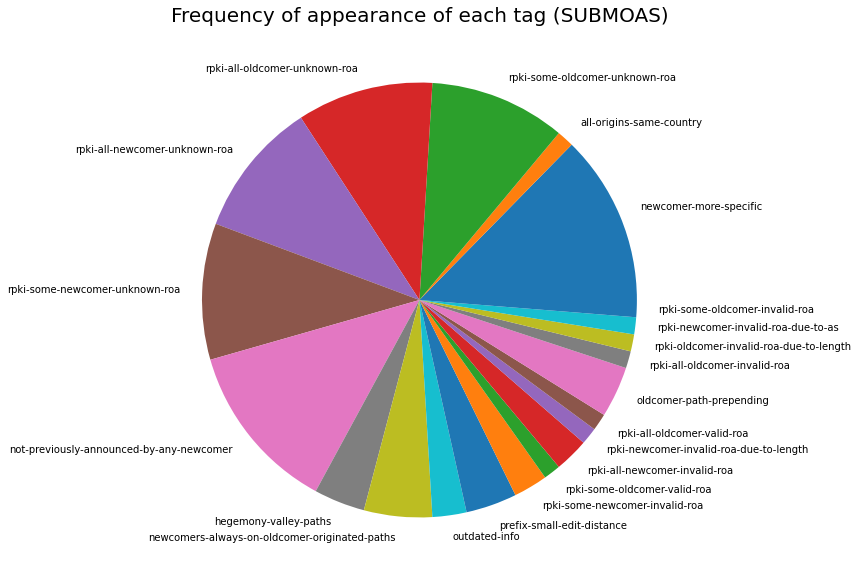

In [121]:
#Make a pie chart illustrating tag frequency

#lables: elements in list_of_tags_count[tag]
#data: Counts in list_of_tags_count[tag]
list_of_tags_count 

# Creating dataset
# cars = ['AUDI', 'BMW', 'FORD',
#         'TESLA', 'JAGUAR', 'MERCEDES']
 
# data = [23, 17, 35, 29, 12, 41]
 
# Creating plot
fig = plt.figure(figsize =(15, 10))
plt.title('Frequency of appearance of each tag (SUBMOAS)', fontsize=20)
plt.pie(list_of_tags_count.values(), labels = list_of_tags_count.keys())
 
# show plot
plt.show()

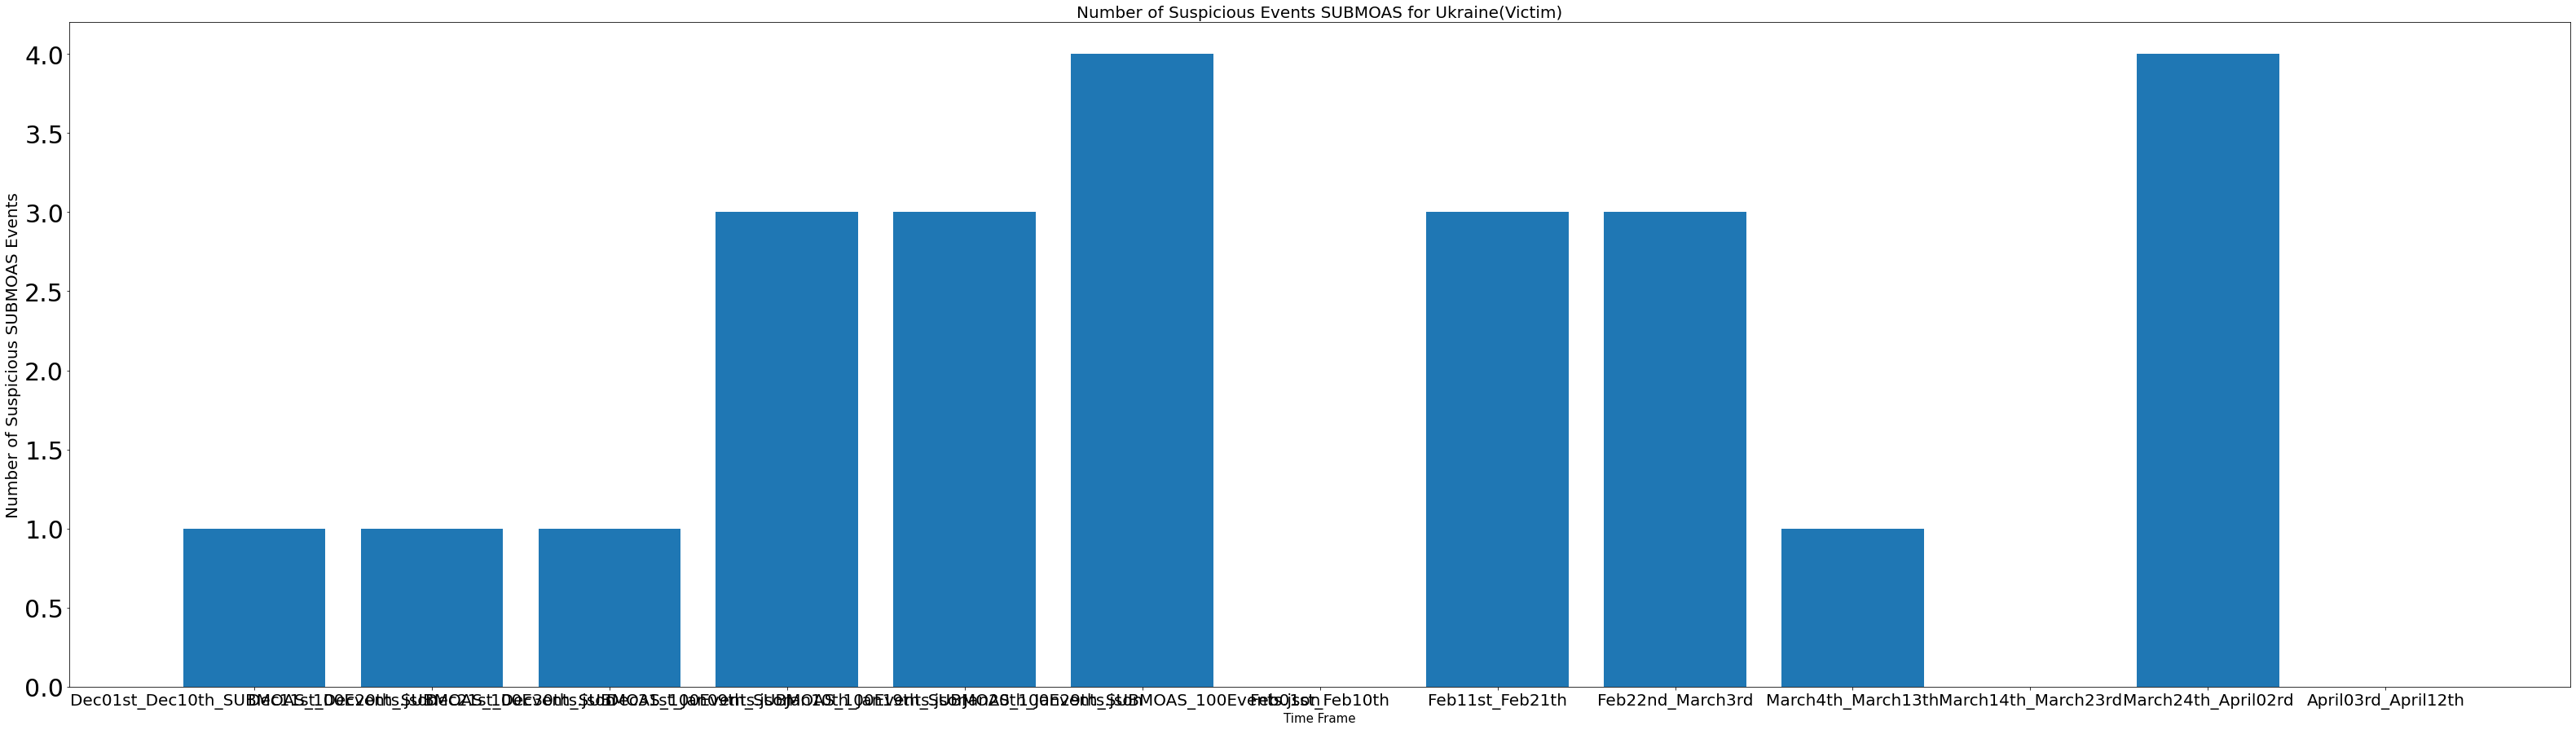

In [108]:
import matplotlib.pyplot as plt
import collections
#Number of Suspicious Events in Ukraine for each period
#print("Period_Number_of_Attacks_On_ISO_dict: " + str(Period_Number_of_Attacks_On_ISO_dict))

sorted_dates = sorted(Period_Number_of_Attacks_On_ISO_dict.keys(), key=numericalSort)

#Order the elements in the dictionary by their number, i.e. [x]_1_SuspiciousEvents_[date1]_date[2]_MOAS_100Events
a = Period_Number_of_Attacks_On_ISO_dict
a_list = sorted_dates
ordered_dict_items = {}
for item in a_list:
    ordered_dict_items[item] = a[item]
#print(str(ordered_dict_items))

trunc_date = []
for date in sorted_dates:
    trunc = date.split('SuspiciousEvents_')
    #print("trunc: " + str(trunc[1]))
    date = trunc[1].split('_subMOAS')
    trunc_date.append(date[0])
#print(str(trunc_date))
    

#Bargraph showing number of times each countried was targeted by suspicious ISO
plt.bar(range(len(Period_Number_of_Attacks_On_ISO_dict)), list(ordered_dict_items.values()), align='center')
plt.xticks(range(len(Period_Number_of_Attacks_On_ISO_dict)), trunc_date, fontsize=20)
plt.yticks(fontsize=30)
plt.ylabel('Number of Suspicious SUBMOAS Events', fontsize=20)
plt.xlabel('Time Frame', fontsize=15)
plt.title('Number of Suspicious Events SUBMOAS for Ukraine(Victim)', fontsize=20)
plt.rcParams["figure.figsize"] = (40,15)
plt.show()

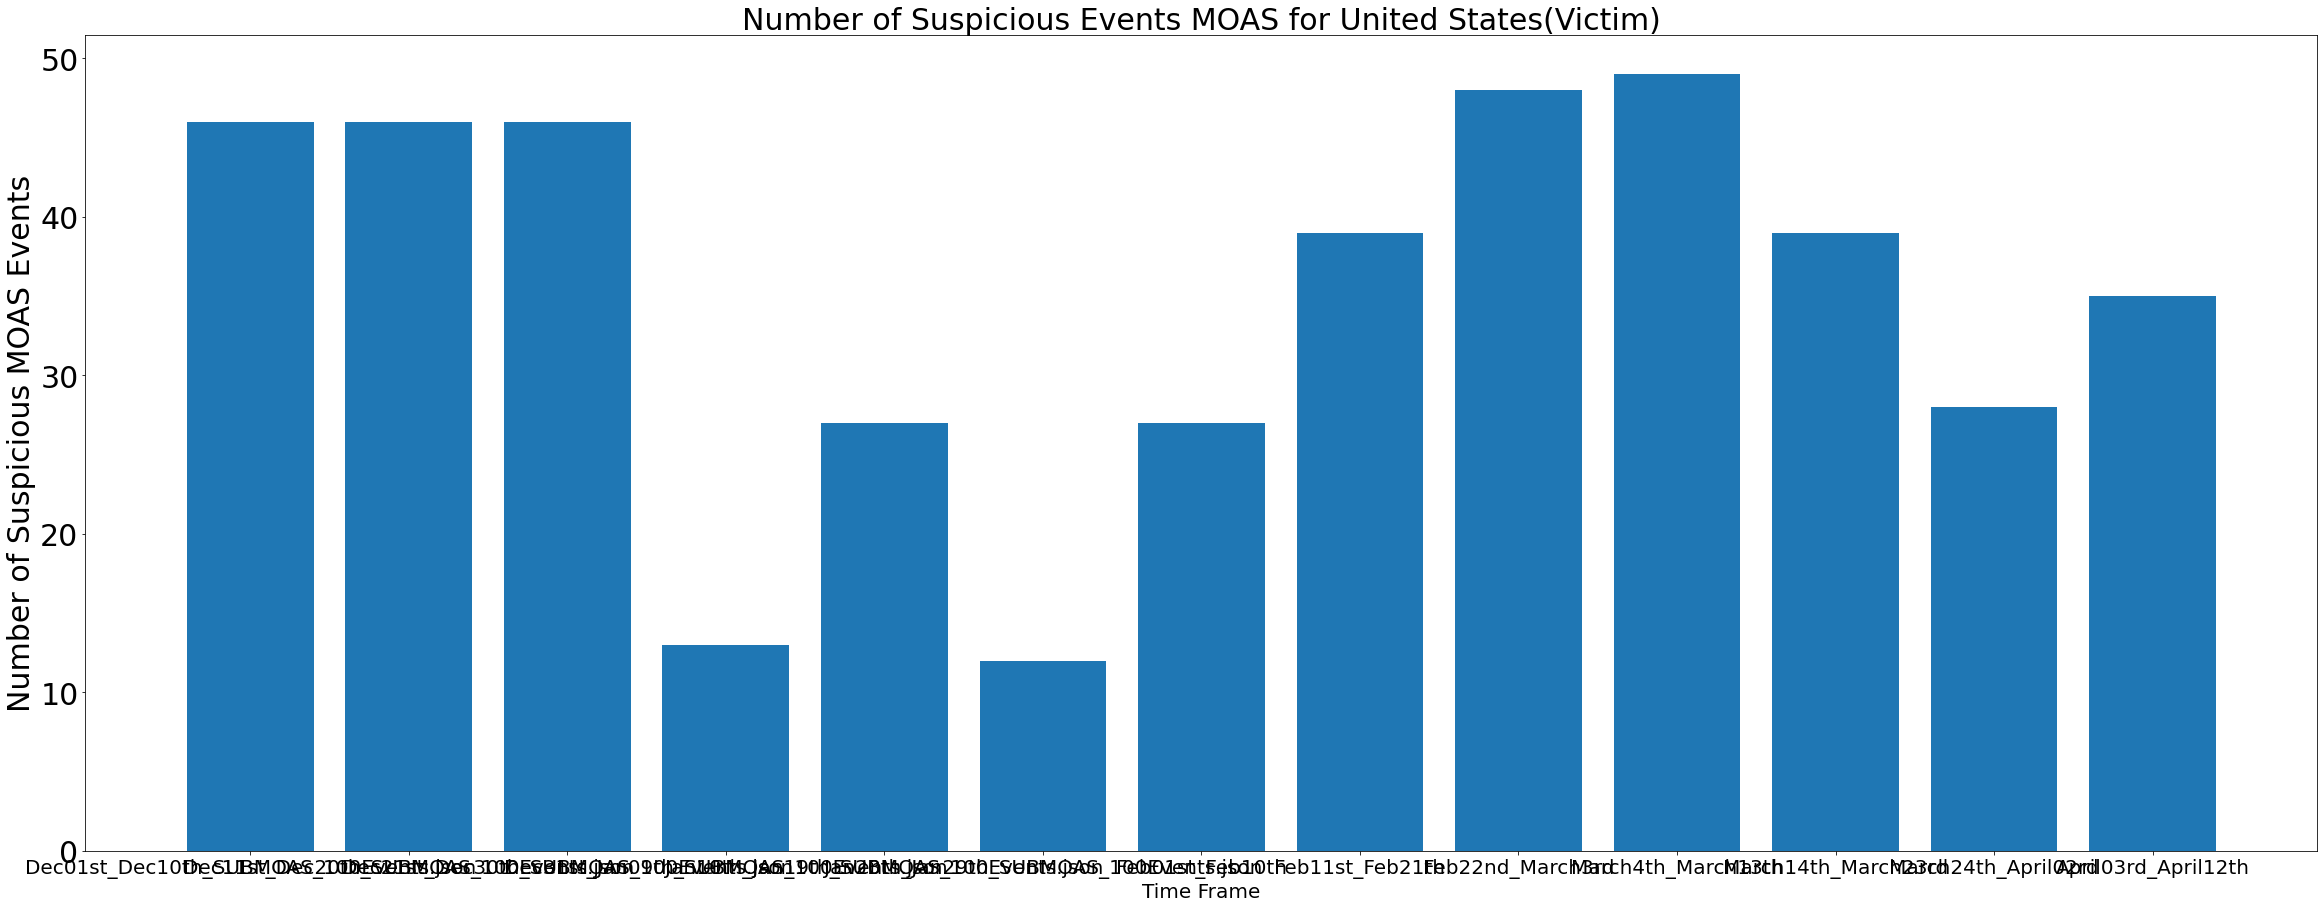

In [109]:
#Choose some unrelated countries and examine if there is a trend in their behavior
#United States, Italy, India, Hong Kong, Brazil, South Africa, Australia

#Chosen Countries 1: US
import matplotlib.pyplot as plt
import collections
#Number of Suspicious Events in Ukraine for each period
#print("Period_Number_of_Attacks_On_ISO_dict: " + str(Period_Number_of_Attacks_On_ISO_dict))

sorted_dates = sorted(Period_Number_of_Attacks_On_ISO_dict_US.keys(), key=numericalSort)

#Order the elements in the dictionary by their number, i.e. [x]_1_SuspiciousEvents_[date1]_date[2]_MOAS_100Events
a = Period_Number_of_Attacks_On_ISO_dict_US
a_list = sorted_dates
ordered_dict_items = {}
for item in a_list:
    ordered_dict_items[item] = a[item]
#print(str(ordered_dict_items))

trunc_date = []
for date in sorted_dates:
    trunc = date.split('SuspiciousEvents_')
    #print("trunc: " + str(trunc[1]))
    date = trunc[1].split('_subMOAS')
    trunc_date.append(date[0])
#print(str(trunc_date))
    

#Bargraph showing number of times each countried was targeted by suspicious ISO
plt.bar(range(len(Period_Number_of_Attacks_On_ISO_dict_US)), list(ordered_dict_items.values()), align='center')
plt.xticks(range(len(Period_Number_of_Attacks_On_ISO_dict_US)), trunc_date, fontsize=20)
plt.yticks(fontsize=30)
plt.ylabel('Number of Suspicious MOAS Events', fontsize=30)
plt.xlabel('Time Frame', fontsize=20)
plt.title('Number of Suspicious Events MOAS for United States(Victim)', fontsize=30)
plt.rcParams["figure.figsize"] = (55,15)
plt.show()


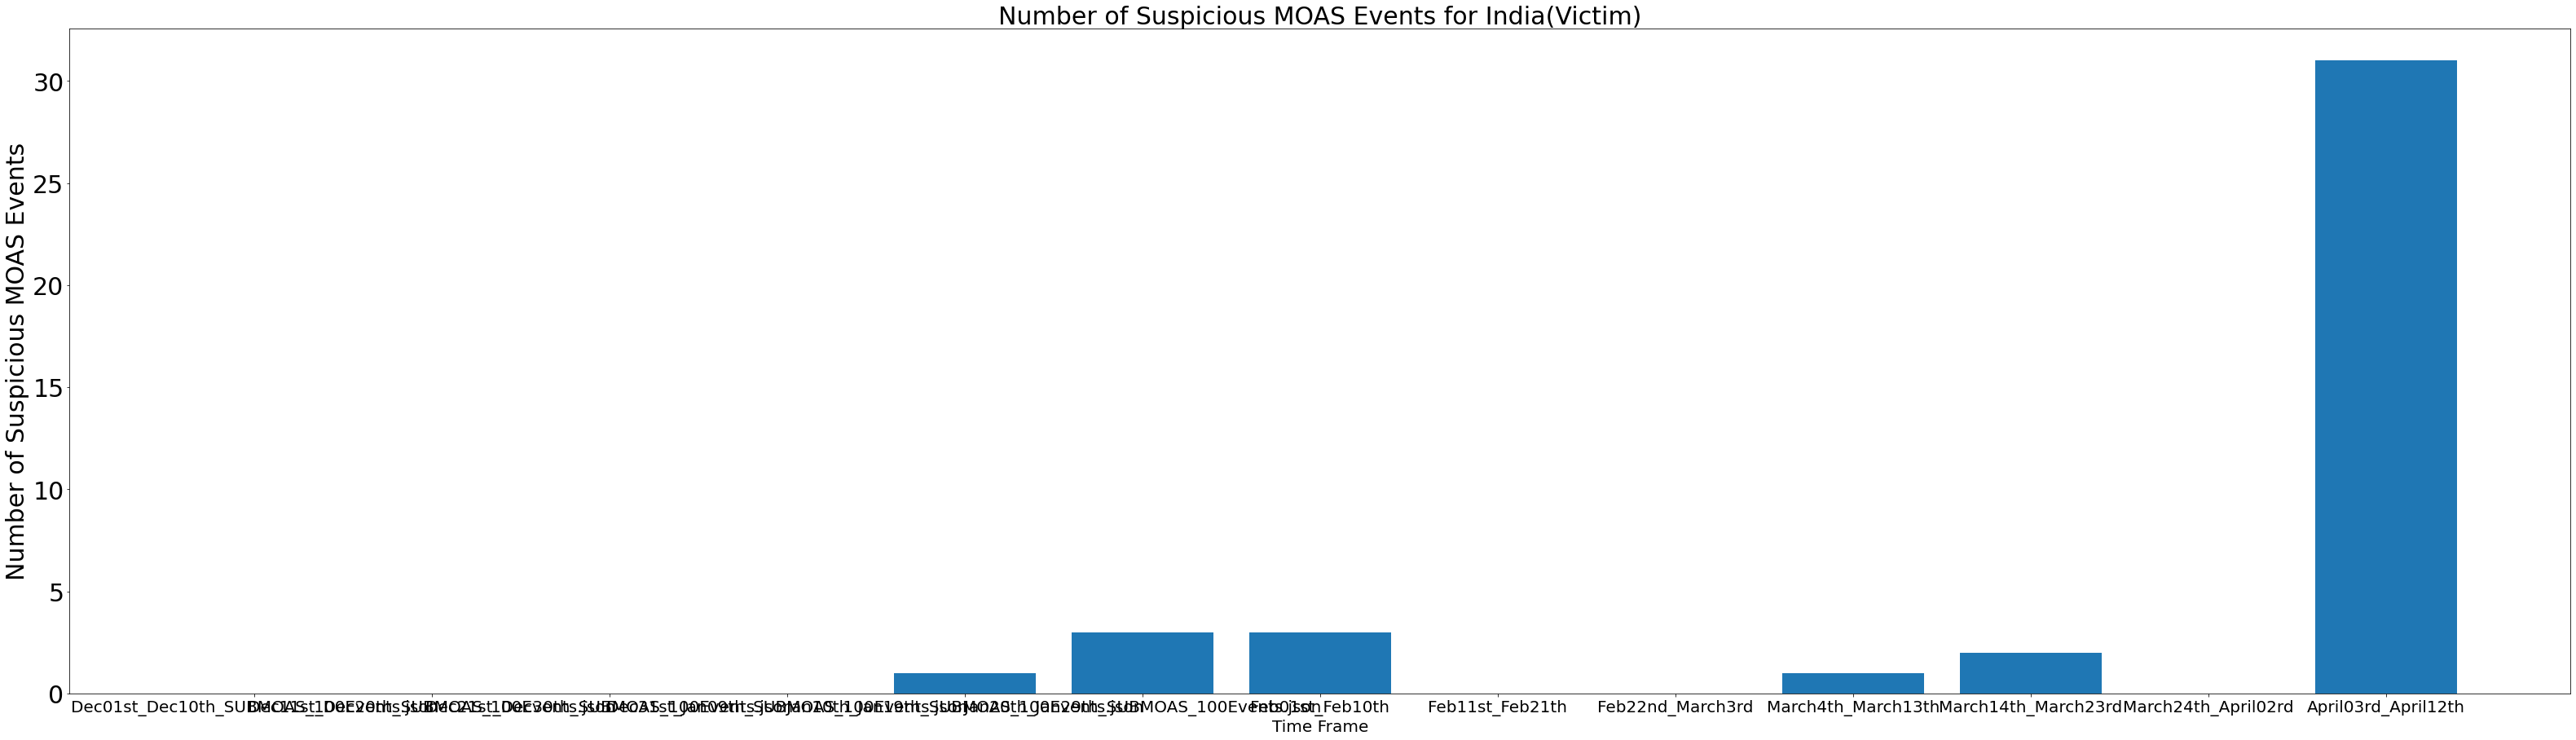

In [110]:
#Chosen Countries 2: India
import matplotlib.pyplot as plt
import collections
#Number of Suspicious Events in Ukraine for each period
#print("Period_Number_of_Attacks_On_ISO_dict: " + str(Period_Number_of_Attacks_On_ISO_dict))

sorted_dates = sorted(Period_Number_of_Attacks_On_ISO_dict_IN.keys(), key=numericalSort)

#Order the elements in the dictionary by their number, i.e. [x]_1_SuspiciousEvents_[date1]_date[2]_MOAS_100Events
a = Period_Number_of_Attacks_On_ISO_dict_IN
a_list = sorted_dates
ordered_dict_items = {}
for item in a_list:
    ordered_dict_items[item] = a[item]
#print(str(ordered_dict_items))

trunc_date = []
for date in sorted_dates:
    trunc = date.split('SuspiciousEvents_')
    #print("trunc: " + str(trunc[1]))
    date = trunc[1].split('_subMOAS')
    trunc_date.append(date[0])
#print(str(trunc_date))
    

#Bargraph showing number of times each countried was targeted by suspicious ISO
plt.bar(range(len(Period_Number_of_Attacks_On_ISO_dict_IN)), list(ordered_dict_items.values()), align='center')
plt.xticks(range(len(Period_Number_of_Attacks_On_ISO_dict_IN)), trunc_date, fontsize=20)
plt.yticks(fontsize=30)
plt.ylabel('Number of Suspicious MOAS Events', fontsize=30)
plt.xlabel('Time Frame', fontsize=20)
plt.title('Number of Suspicious MOAS Events for India(Victim)', fontsize=30)
plt.rcParams["figure.figsize"] = (55,15)
plt.show()




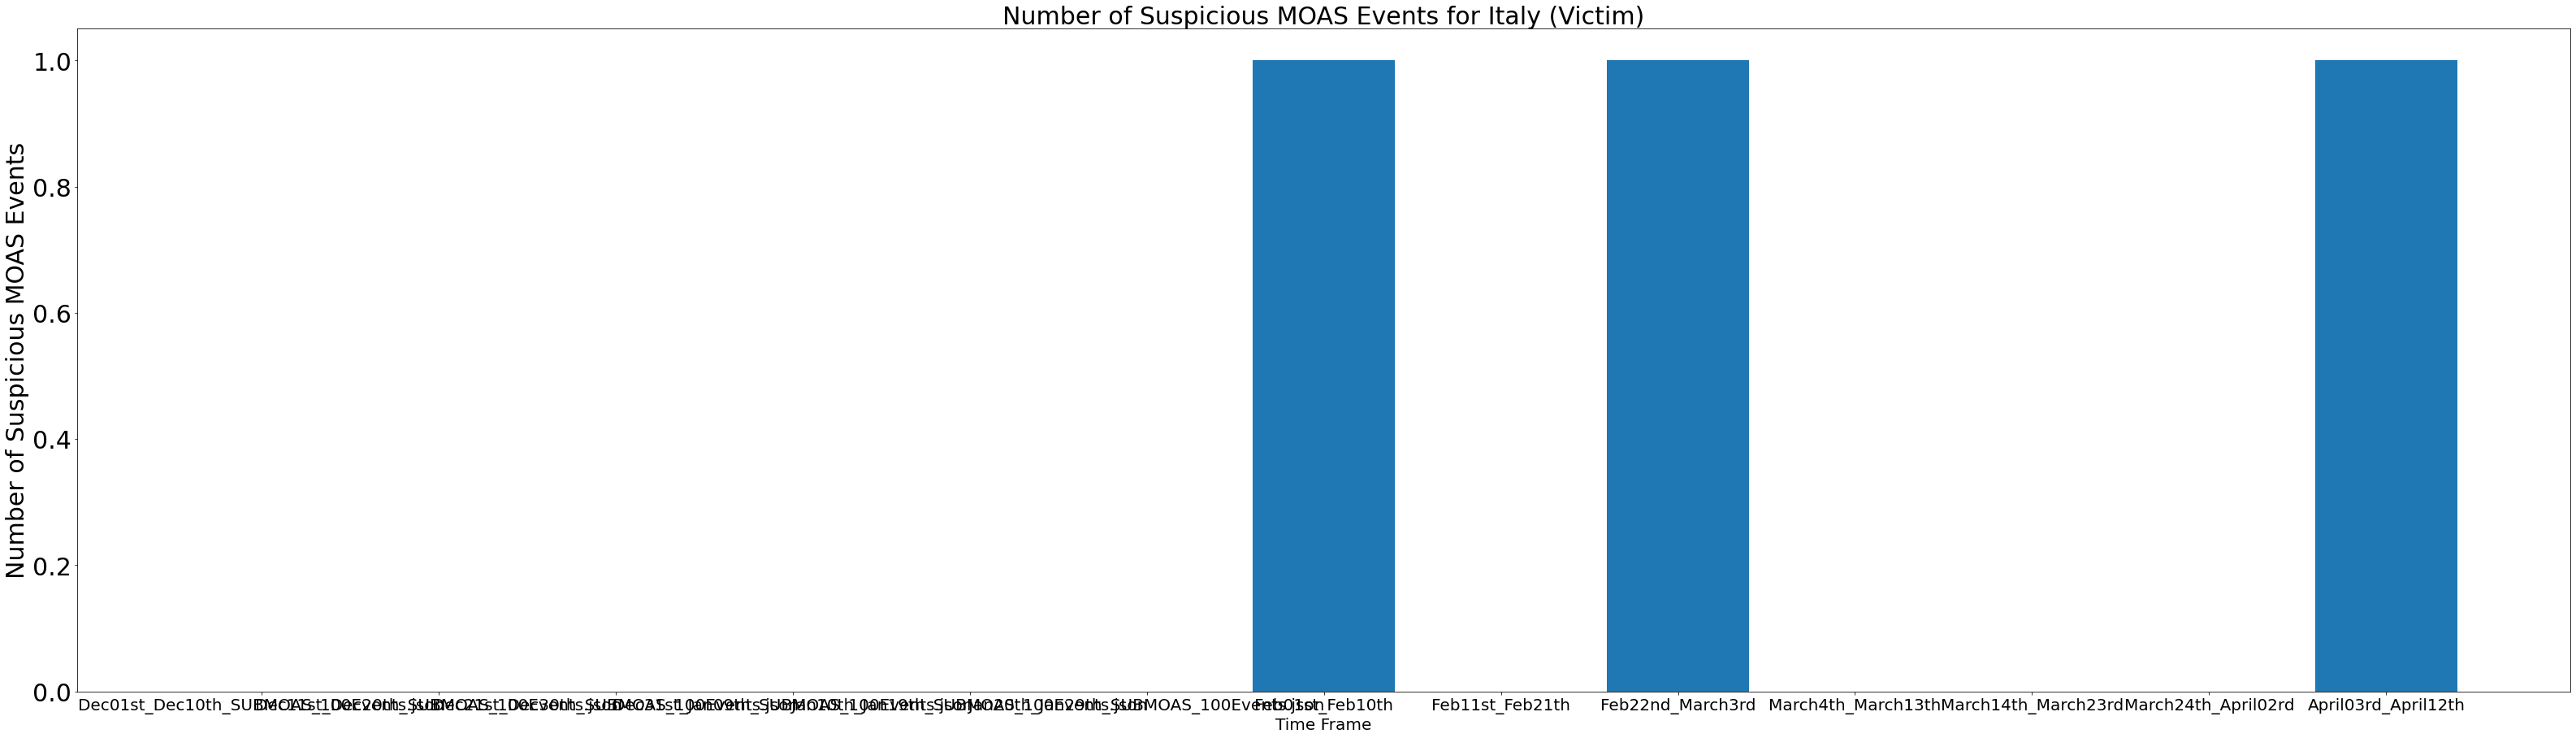

In [111]:
#Chosen Countries 3: Italy
import matplotlib.pyplot as plt
import collections
#Number of Suspicious Events in Ukraine for each period
#print("Period_Number_of_Attacks_On_ISO_dict: " + str(Period_Number_of_Attacks_On_ISO_dict))

sorted_dates = sorted(Period_Number_of_Attacks_On_ISO_dict_IT.keys(), key=numericalSort)

#Order the elements in the dictionary by their number, i.e. [x]_1_SuspiciousEvents_[date1]_date[2]_MOAS_100Events
a = Period_Number_of_Attacks_On_ISO_dict_IT
a_list = sorted_dates
ordered_dict_items = {}
for item in a_list:
    ordered_dict_items[item] = a[item]
#print(str(ordered_dict_items))

trunc_date = []
for date in sorted_dates:
    trunc = date.split('SuspiciousEvents_')
    #print("trunc: " + str(trunc[1]))
    date = trunc[1].split('_subMOAS')
    trunc_date.append(date[0])
#print(str(trunc_date))
    

#Bargraph showing number of times each countried was targeted by suspicious ISO
plt.bar(range(len(Period_Number_of_Attacks_On_ISO_dict_IT)), list(ordered_dict_items.values()), align='center')
plt.xticks(range(len(Period_Number_of_Attacks_On_ISO_dict_IT)), trunc_date, fontsize=20)
plt.yticks(fontsize=30)
plt.ylabel('Number of Suspicious MOAS Events', fontsize=30)
plt.xlabel('Time Frame', fontsize=20)
plt.title('Number of Suspicious MOAS Events for Italy (Victim)', fontsize=30)
plt.rcParams["figure.figsize"] = (55,15)
plt.show()

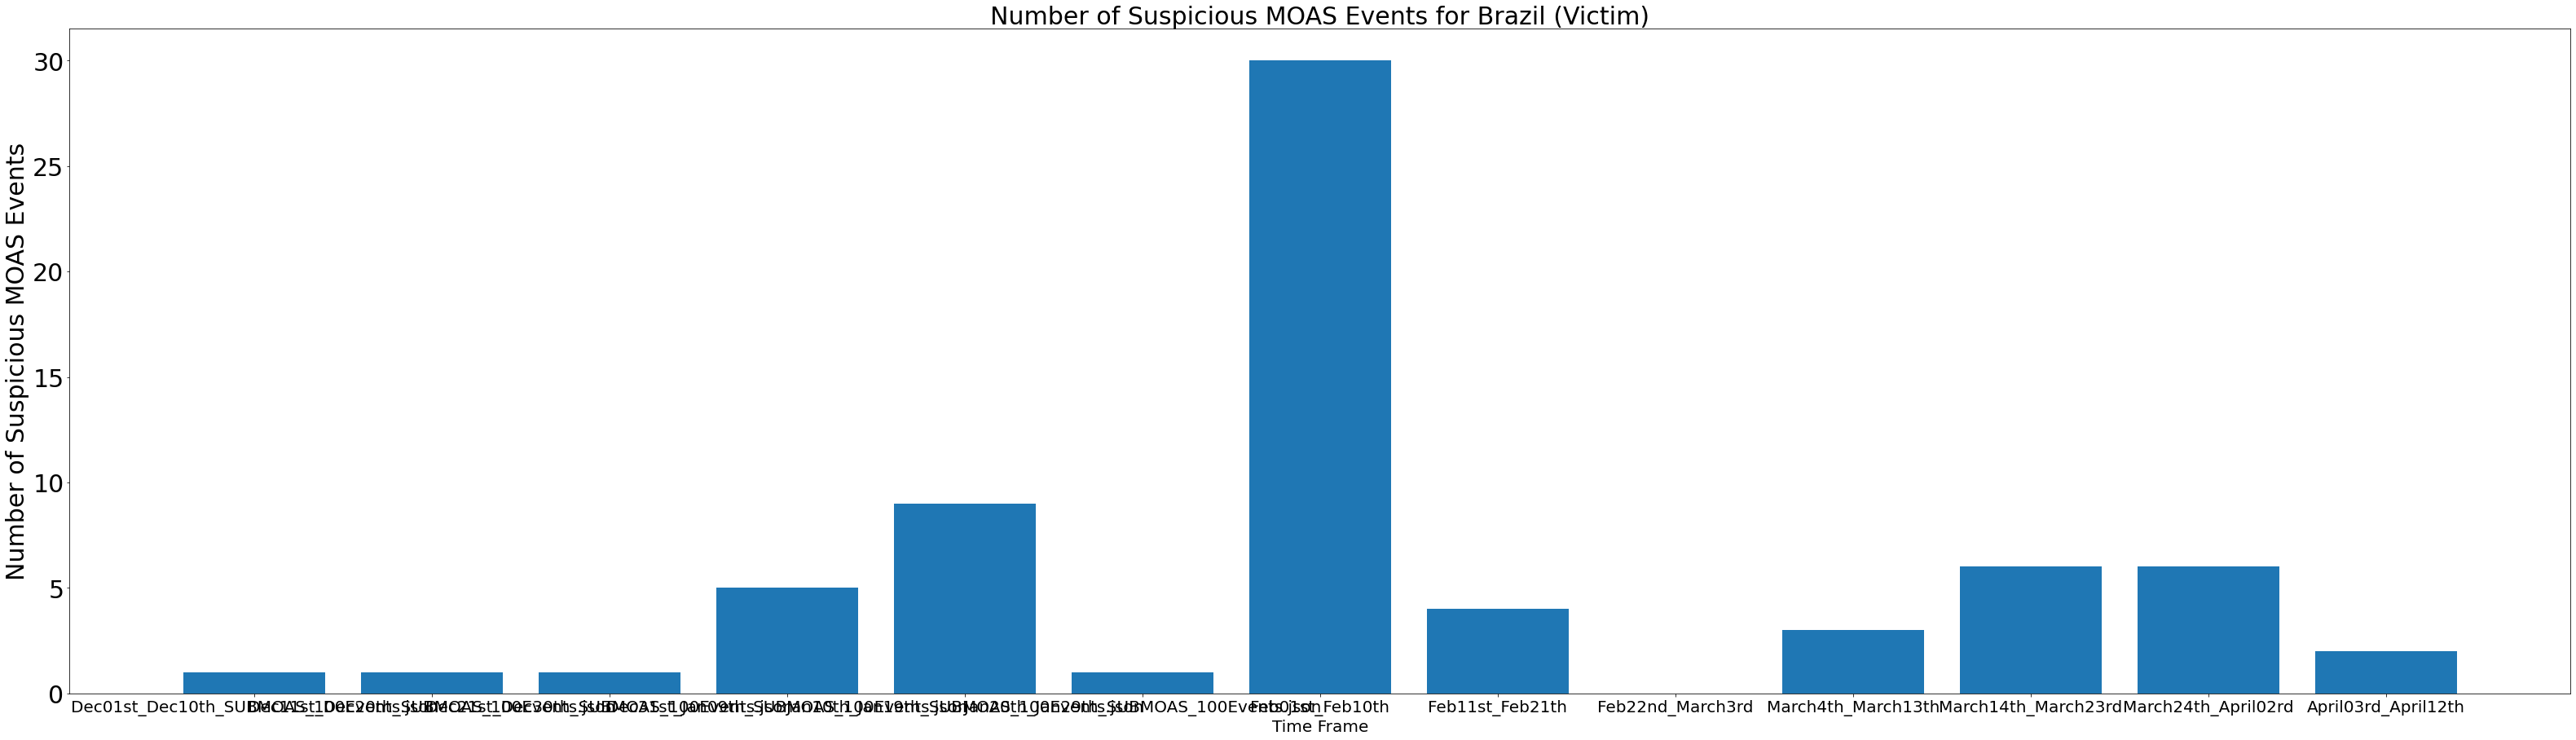

In [112]:
#Chosen Countries 4: Brazil
import matplotlib.pyplot as plt
import collections
#Number of Suspicious Events in Ukraine for each period
#print("Period_Number_of_Attacks_On_ISO_dict: " + str(Period_Number_of_Attacks_On_ISO_dict))

sorted_dates = sorted(Period_Number_of_Attacks_On_ISO_dict_BR.keys(), key=numericalSort)

#Order the elements in the dictionary by their number, i.e. [x]_1_SuspiciousEvents_[date1]_date[2]_MOAS_100Events
a = Period_Number_of_Attacks_On_ISO_dict_BR
a_list = sorted_dates
ordered_dict_items = {}
for item in a_list:
    ordered_dict_items[item] = a[item]
#print(str(ordered_dict_items))

trunc_date = []
for date in sorted_dates:
    trunc = date.split('SuspiciousEvents_')
    #print("trunc: " + str(trunc[1]))
    date = trunc[1].split('_subMOAS')
    trunc_date.append(date[0])
#print(str(trunc_date))
    

#Bargraph showing number of times each countried was targeted by suspicious ISO
plt.bar(range(len(Period_Number_of_Attacks_On_ISO_dict_BR)), list(ordered_dict_items.values()), align='center')
plt.xticks(range(len(Period_Number_of_Attacks_On_ISO_dict_BR)), trunc_date, fontsize=20)
plt.yticks(fontsize=30)
plt.ylabel('Number of Suspicious MOAS Events', fontsize=30)
plt.xlabel('Time Frame', fontsize=20)
plt.title('Number of Suspicious MOAS Events for Brazil (Victim)', fontsize=30)
plt.rcParams["figure.figsize"] = (55,15)
plt.show()

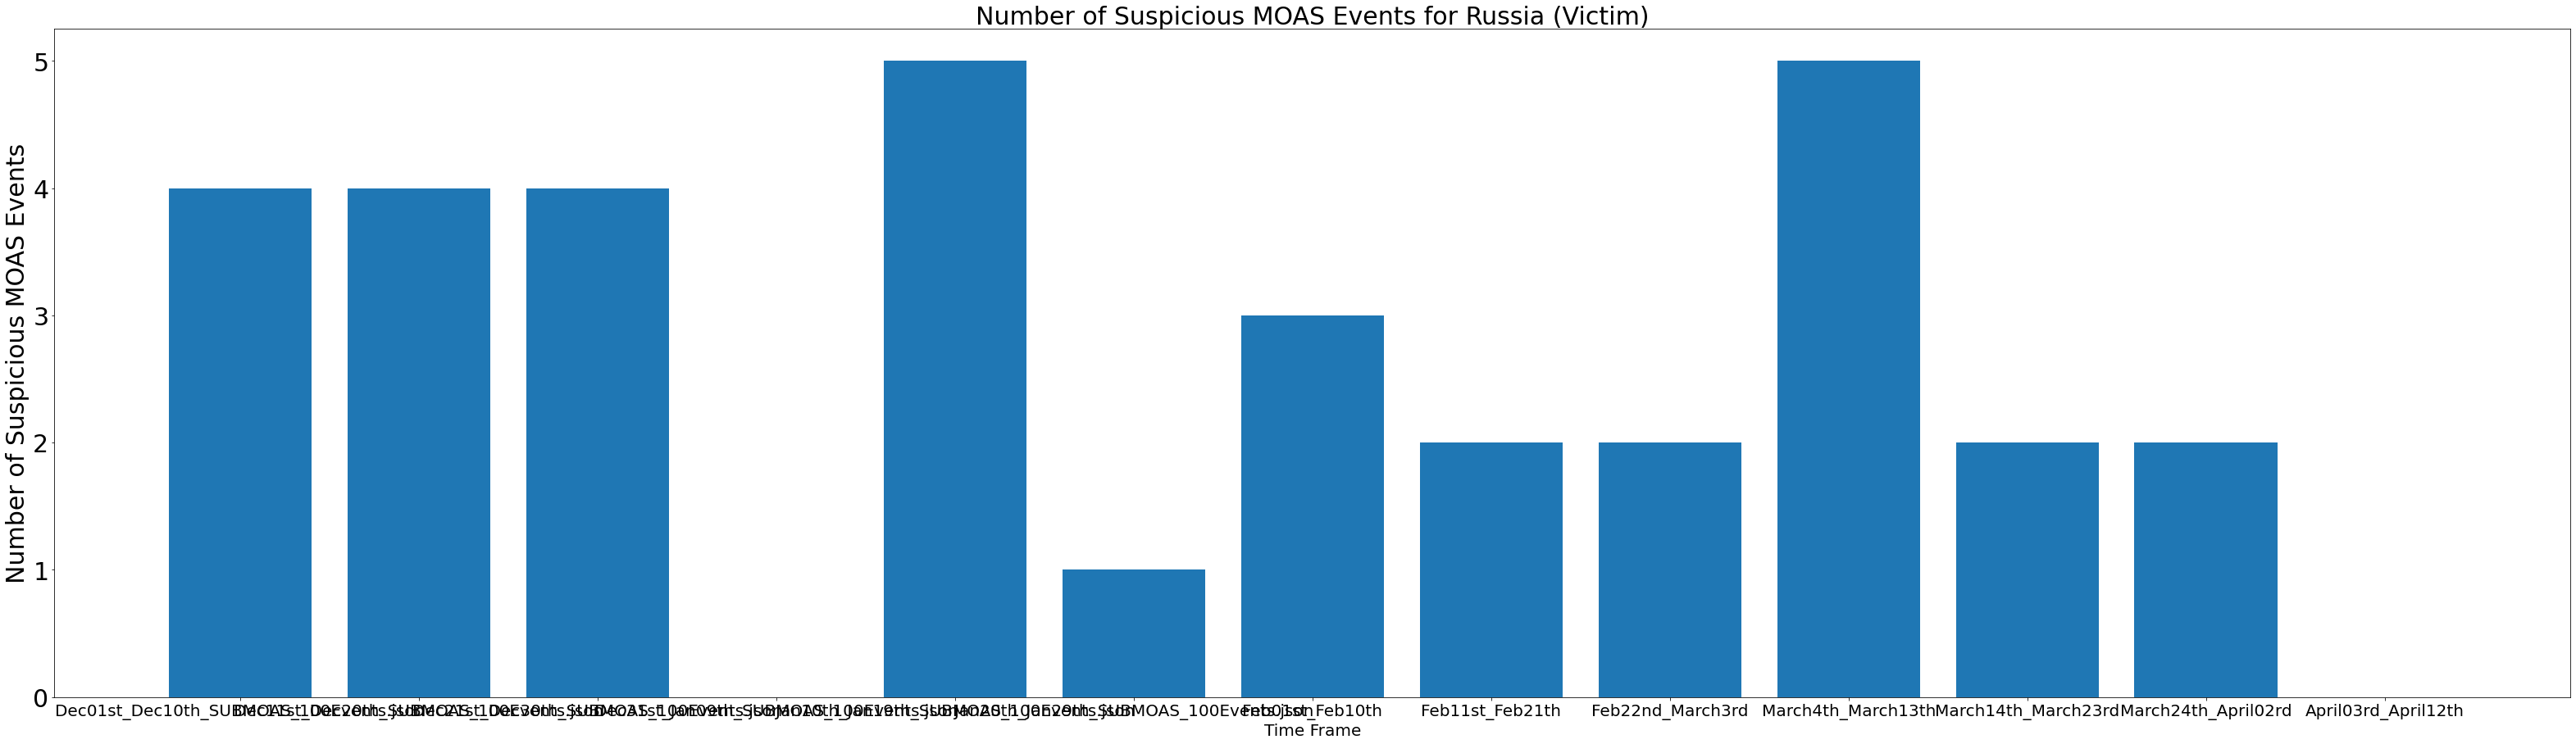

In [113]:

#Did Russia(RU) see a rise in MOAS hijacks during the periods in question?

import matplotlib.pyplot as plt
import collections
#Number of Suspicious Events in Ukraine for each period
#print("Period_Number_of_Attacks_On_ISO_dict: " + str(Period_Number_of_Attacks_On_ISO_dict))

sorted_dates = sorted(Period_Number_of_Attacks_On_ISO_dict_RU.keys(), key=numericalSort)

#Order the elements in the dictionary by their number, i.e. [x]_1_SuspiciousEvents_[date1]_date[2]_MOAS_100Events
a = Period_Number_of_Attacks_On_ISO_dict_RU
a_list = sorted_dates
ordered_dict_items = {}
for item in a_list:
    ordered_dict_items[item] = a[item]
#print(str(ordered_dict_items))

trunc_date = []
for date in sorted_dates:
    trunc = date.split('SuspiciousEvents_')
    #print("trunc: " + str(trunc[1]))
    date = trunc[1].split('_subMOAS')
    trunc_date.append(date[0])
#print(str(trunc_date))
    

#Bargraph showing number of times each countried was targeted by suspicious ISO
plt.bar(range(len(Period_Number_of_Attacks_On_ISO_dict_RU)), list(ordered_dict_items.values()), align='center')
plt.xticks(range(len(Period_Number_of_Attacks_On_ISO_dict_RU)), trunc_date, fontsize=20)
plt.yticks(fontsize=30)
plt.ylabel('Number of Suspicious MOAS Events', fontsize=30)
plt.xlabel('Time Frame', fontsize=20)
plt.title('Number of Suspicious MOAS Events for Russia (Victim)', fontsize=30)
plt.rcParams["figure.figsize"] = (55,15)
plt.show()

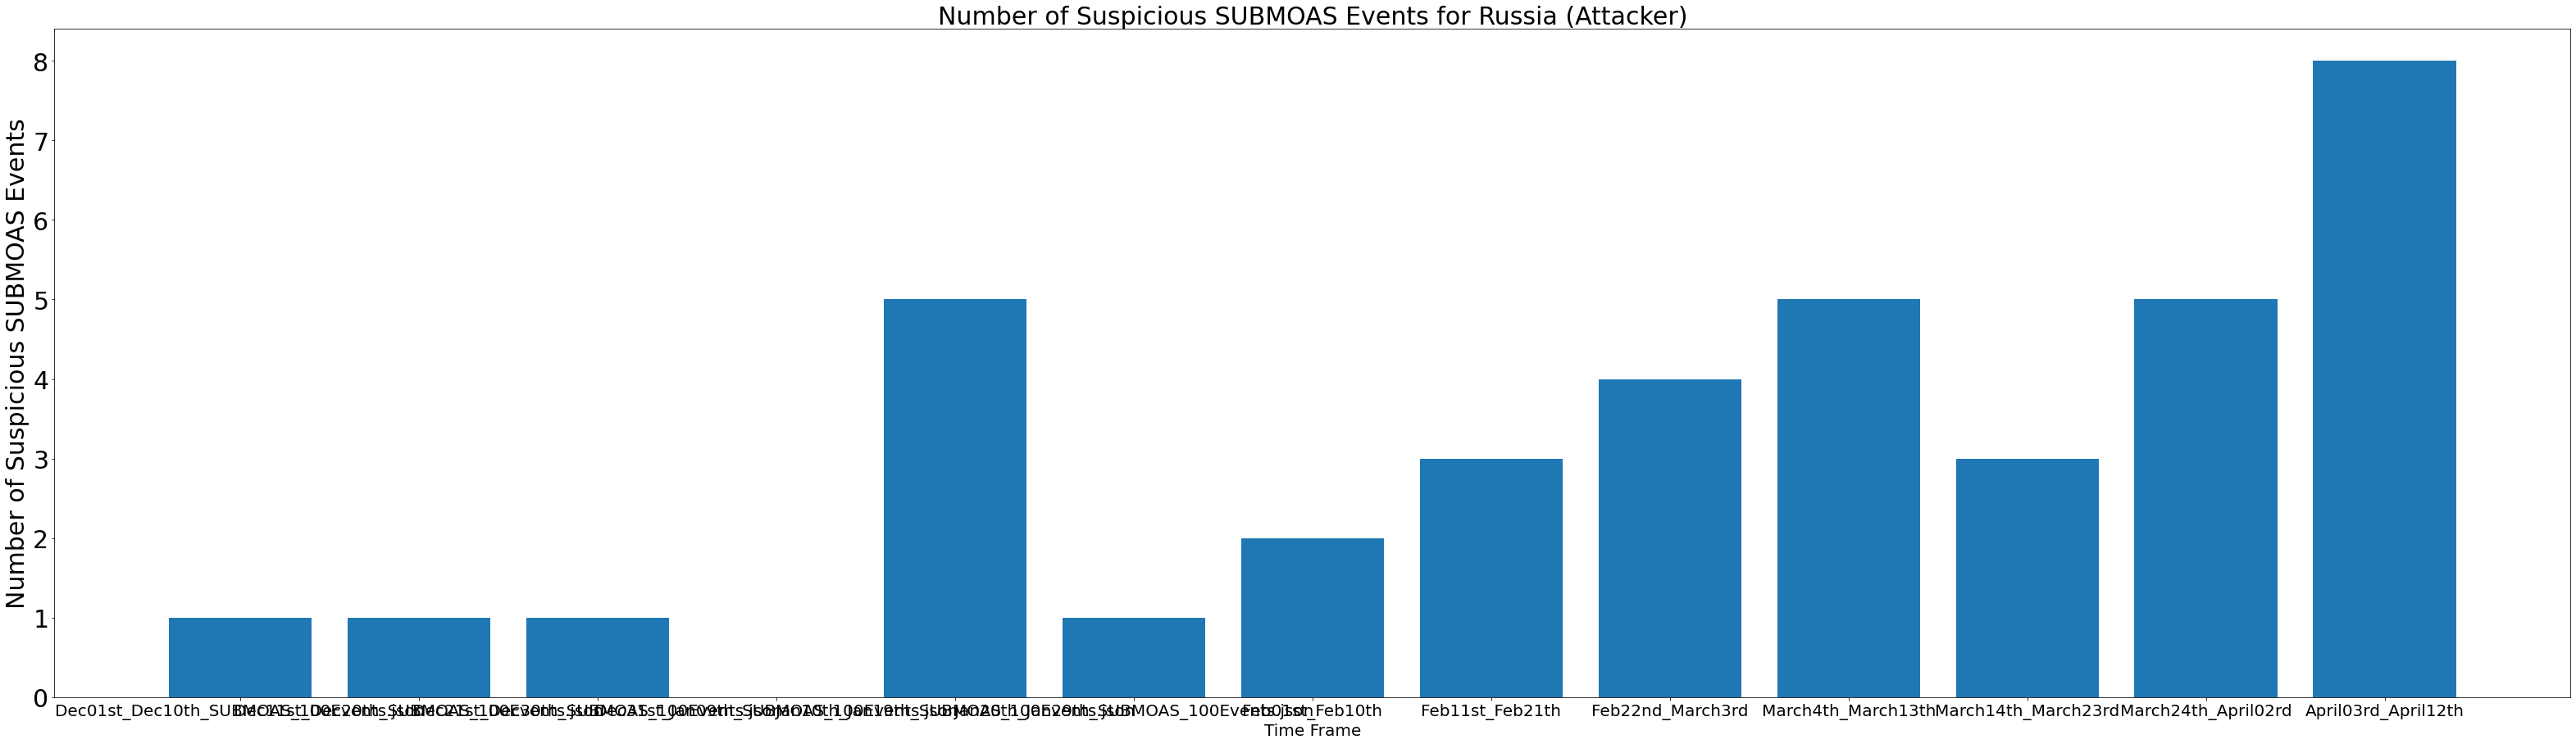

In [114]:
#As an Attacker, did Russia(RU) indicate greater activity?

import matplotlib.pyplot as plt
import collections
#Number of Suspicious Events in Ukraine for each period
#print("Period_Number_of_Attacks_On_ISO_dict: " + str(Period_Number_of_Attacks_On_ISO_dict))

sorted_dates = sorted(Period_Number_of_Attacks_By_ISO_dict_RU.keys(), key=numericalSort)

#Order the elements in the dictionary by their number, i.e. [x]_1_SuspiciousEvents_[date1]_date[2]_MOAS_100Events
a = Period_Number_of_Attacks_By_ISO_dict_RU
a_list = sorted_dates
ordered_dict_items = {}
for item in a_list:
    ordered_dict_items[item] = a[item]
#print(str(ordered_dict_items))

trunc_date = []
for date in sorted_dates:
    trunc = date.split('SuspiciousEvents_')
    #print("trunc: " + str(trunc[1]))
    date = trunc[1].split('_subMOAS')
    trunc_date.append(date[0])
#print(str(trunc_date))
    

#Bargraph showing number of times each countried was targeted by suspicious ISO
plt.bar(range(len(Period_Number_of_Attacks_By_ISO_dict_RU)), list(ordered_dict_items.values()), align='center')
plt.xticks(range(len(Period_Number_of_Attacks_By_ISO_dict_RU)), trunc_date, fontsize=20)
plt.yticks(fontsize=30)
plt.ylabel('Number of Suspicious SUBMOAS Events', fontsize=30)
plt.xlabel('Time Frame', fontsize=20)
plt.title('Number of Suspicious SUBMOAS Events for Russia (Attacker)', fontsize=30)
plt.rcParams["figure.figsize"] = (55,15)
plt.show()


Countries_Russia_Attacked: {'None-Russia': 1, 'Russia-Russia': 19, 'Moldova-Russia': 1, 'Latvia-Russia': 1, 'United States-Russia': 2, 'Iraq-Russia': 3, 'India-Russia': 8, 'Romania-Russia': 1, 'Ukraine-Russia': 2, 'Czechia-Russia': 1}


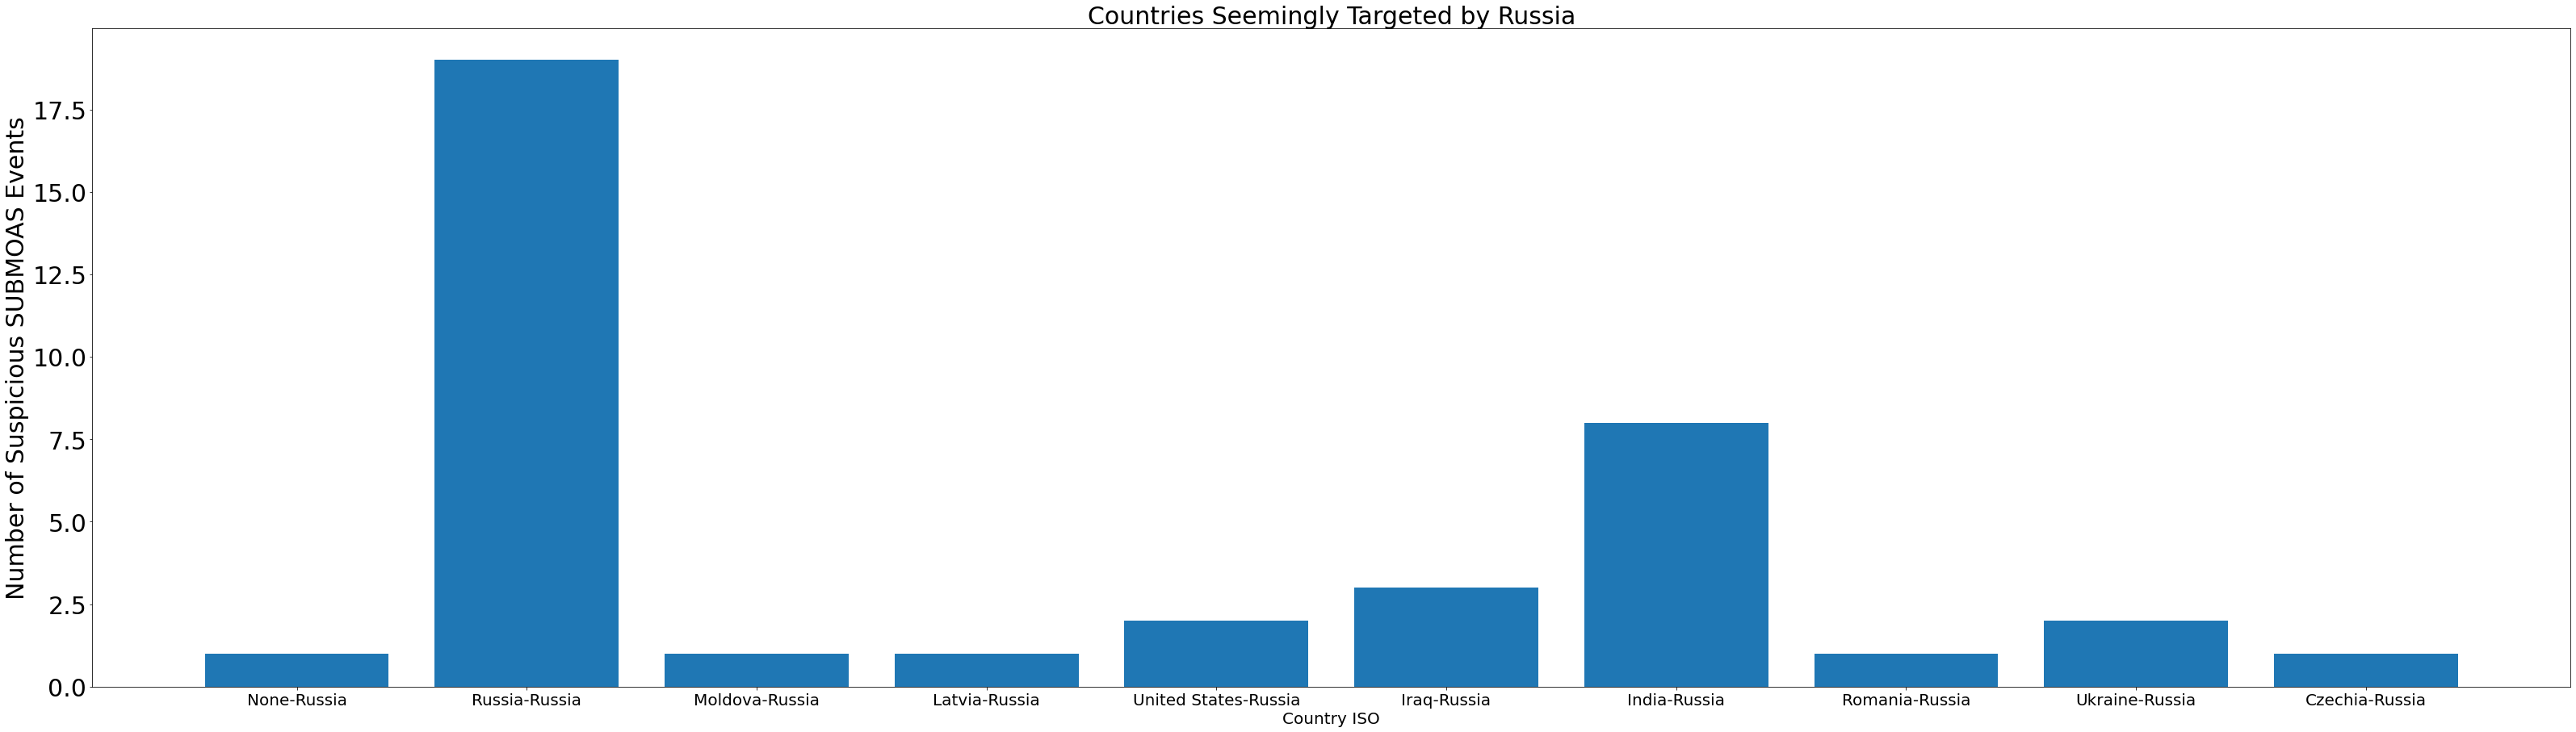

In [115]:
#Who is Russia launching suspicious behavior against?

print("Countries_Russia_Attacked: " + str(Countries_Russia_Attacked))

#Bargraph showing number of times each countried was targeted by suspicious ISO
plt.bar(range(len(Countries_Russia_Attacked)), list(Countries_Russia_Attacked.values()), align='center')
plt.xticks(range(len(Countries_Russia_Attacked)), Countries_Russia_Attacked.keys(), fontsize=20)
plt.yticks(fontsize=30)
plt.ylabel('Number of Suspicious SUBMOAS Events', fontsize=30)
plt.xlabel('Country ISO', fontsize=20)
plt.title('Countries Seemingly Targeted by Russia', fontsize=30)
plt.rcParams["figure.figsize"] = (55,15)
plt.show()